In [59]:
import tensorflow as tf
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
tf.keras.preprocessing.image.load_img
tf.keras.preprocessing.image.img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense

from keras.models import Sequential, Model
#rom keras.applications.xception import Xception
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop



import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline


In [60]:
DATASET_DIR = "C:/Users/kdwiv/Downloads/Intel/PROJECT/2/archive (1)/dataset"

IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 9
BATCH_SIZE = 8


In [61]:
os.listdir(DATASET_DIR)

['covid', 'normal']

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#model.compile(Adam(lr=0.0001),loss="binary_crossentropy", metrics=["accuracy"])


In [64]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_30 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_31 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                 

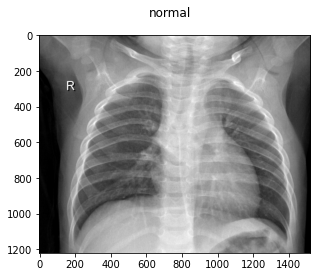

In [65]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 


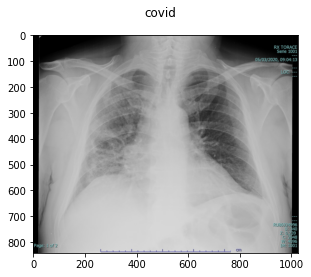

In [66]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 


In [67]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, # same directory as training data
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)


Found 59 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


C:\Users\kdwiv\AppData\Local\Temp\ipykernel_8600\135549030.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/9
7/7 [==============================] - 5s 457ms/step - loss: 0.9993 - accuracy: 0.6667 - val_loss: 0.7595 - val_accuracy: 0.6562
Epoch 2/9
7/7 [==============================] - 3s 391ms/step - loss: 0.7035 - accuracy: 0.7255 - val_loss: 0.5273 - val_accuracy: 0.8125
Epoch 3/9
7/7 [==============================] - 3s 371ms/step - loss: 0.5575 - accuracy: 0.8039 - val_loss: 0.5305 - val_accuracy: 0.8750
Epoch 4/9
7/7 [==============================] - 3s 370ms/step - loss: 0.4651 - accuracy: 0.7451 - val_loss: 0.4715 - val_accuracy: 0.7500
Epoch 5/9
7/7 [==============================] - 3s 385ms/step - loss: 0.3983 - accuracy: 0.8214 - val_loss: 0.2989 - val_accuracy: 0.9062
Epoch 6/9
7/7 [==============================] - 3s 385ms/step - loss: 0.3515 - accuracy: 0.9107 - val_loss: 0.2242 - val_accuracy: 0.9375
Epoch 7/9
7/7 [==============================] - 3s 362ms/step - loss: 0.3185 - accuracy: 0.8039 - val_loss: 0.3984 - val_accuracy: 0.8125
Epoch 8/9
7/7 [============

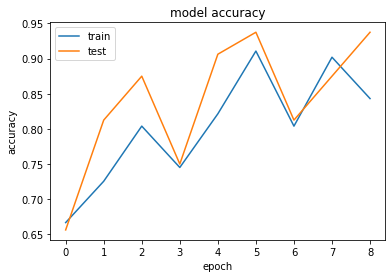

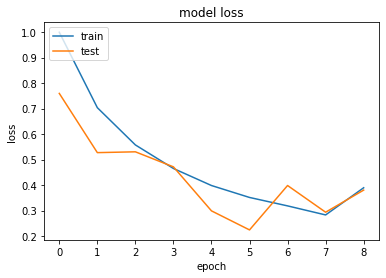

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()